# **Building a neural network**
This notebook will walk you through building a neural network in Python.

Before starting, use the shortcut **Ctrl+]** to collapse all cells in the notebook. This ensures that solutions will not be spoiled before you answer the coding questions in this notebook. You can safely unhide the outermost cells; solutions will still be hidden.

# Importing

All we need for now is `numpy`, introduced in the previous notebook.

\

Unhide the following cell, and run the code by either:
- clicking the "run" button on the left of the cell
- using the shortcut **Ctrl+Enter**

In [ ]:
import numpy as np

# Before we start...

We'll be using a neural network with 3 hidden layers. $n^{[1]} = 3, n^{[2]} = 3$, and $n^{[3]} = 1$.

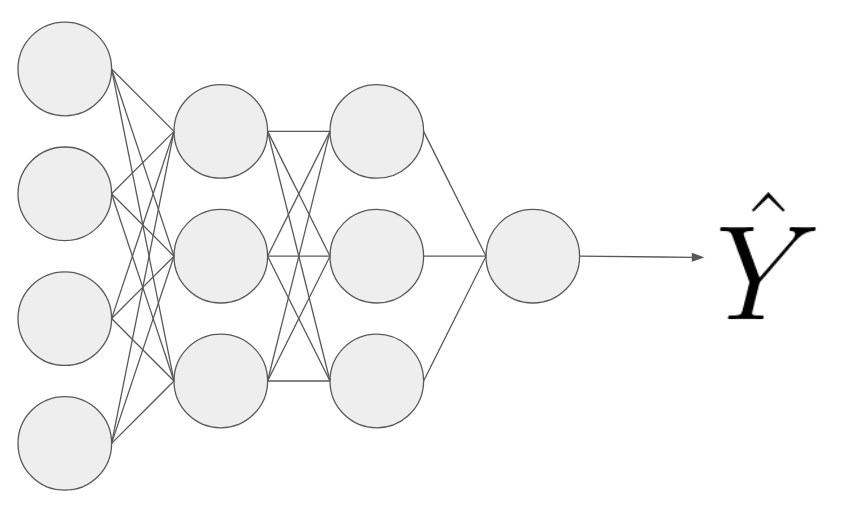

The last layer will use sigmoid activation, while the other layers will use ReLU activation.

# Initializing *W* and *b*

We will write a function to initialize $W$ to contain random values in the range $(0,1)$. (This means that all the random values are between 0 and 1, not including 0 or 1.) We will initialize $b$ to contain all 0s.

Recall that we can use `np.random.rand(d0, d1)` to create a 2D matrix with d0 rows and d1 columns. We have a similar function to create a matrix with 0s:

#### **Introduction to library function:** [`np.zeros((d0, d1))`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

*Links above go to official Numpy documentation.*

Note that we surround our input to `np.zeros` with an additional set of parentheses. This is because the the input to `np.zeros` is a tuple, rather than several separate numbers.

The following statement creates a matrix with dimensions $(d0, d1)$ where each element is a 0:

```np.zeros((d0, d1))```

In [ ]:
# we will choose n_rows, n_cols later on -- for now,
# don't worry about it.

def initialize_weights_and_biases(n_rows, n_cols):

  # START CODE HERE
  W = None
  b = None
  # END CODE HERE

  return W, b

### Solution:

In [ ]:
def initialize_weights_and_biases_sol(n_rows, n_cols):

  # START CODE HERE
  W = np.random.rand(n_rows, n_cols)
  b = np.zeros((n_rows, 1))
  # END CODE HERE

  return W, b

# Providing the sigmoid function for use

In the "Classification with Machine Learning" lesson, we wrote code for the sigmoid activation function. We are providing the code for that function below; we will use this later on.

In [ ]:
def sigmoid(z):

  a = 1 / (1 + np.exp(-1 * z))

  return a

# The ReLU

Write the ReLU (Rectified Linear Unit) function, defined as

$$y = \begin{cases} x & x > 0  \\ 0 & x \leq 0 \end{cases}$$

We will use this function later as one of the activation functions in our neural network.

The most efficient way to write this is to take the maximum of 0 and $x$. You are encouraged to use the following function:

#### **Introduction to library function:** [`np.max(x0, x1)`](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html)

*Links above go to official Numpy documentation.*

Note that since we are working with NumPy objects, we cannot use Python's `max()` function on them -- we have to use `np.maximum()`.

In [ ]:
# use np.max() to take the maximum of 0 and Z

def relu(Z):

  # START CODE HERE
  A = None
  # END CODE HERE

  return A

### Solution:

In [ ]:
def relu_sol(Z):

  # START CODE HERE
  A = np.maximum(0, Z)
  # END CODE HERE

  return A

# Forward propagation: calculating *Z, A* for one layer

Recall that for the $l$th layer,
$$Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$$

except when $l=1$, in which case we use input $X$ instead of $A^{[l-1]}$:

$$Z^{[1]} = W^{[1]}X + b^{[1]}$$

Note that NumPy broadcasting allows us to add $b^{[l]}$ and $W^{[l]}A^{[l-1]}$ together even though they do not have matching dimensions.

Notice that the code below lets us specify which activation function we want to use for a particular layer. We will calculate `A` using a different activation function depending on the parameter `activation_function`.

Recall that we can multiply two NumPy matrices together using the `@` operator.

In [ ]:
# use functions we have written along with the @ operator

def forward_propagate(A_prev, W, b, activation_function="relu"):

  # START CODE HERE
  Z = None
  # END CODE HERE

  if activation_function == "relu":
    # START CODE HERE
    A = None
    # END CODE HERE
  else:
    # START CODE HERE
    A = None
    # END CODE HERE

  return Z, A

### Solution:

In [ ]:
def forward_propagate_sol(A_prev, W, b, activation_function="relu"):

  # START CODE HERE
  Z = W @ A_prev + b
  # END CODE HERE

  if activation_function == "relu":
    # START CODE HERE
    A = relu(Z)
    # END CODE HERE
  else:
    # START CODE HERE
    A = sigmoid(Z)
    # END CODE HERE

  return Z, A

# Calculating the cost

Our cost is:

$$\frac{1}{m} \sum_{i=0}^{m} -[Y\log(A^{[L]}) + (1-Y)\log(1-A^{[L]})]$$

When we calculate cost, we compare the activation of the last layer $A^{[L]}$ with the labels $Y$. Note the activation of the last layer $A^{[L]}$ is essentially the same thing as $\hat{Y}$ from previous lessons.

Like in the "Classification with Machine Learning" lesson, we can write out the cost in one line. Use previously introduced functions `np.sum` and `np.log`.

In [ ]:
def calculate_cost(A5, Y):

  m = A5.shape[1]

  # START CODE HERE
  cost = None
  # END CODE HERE

  return cost

### Solution:

In [ ]:
def calculate_cost_sol(A5, Y):

  m = A5.shape[1]

  # START CODE HERE
  cost = np.sum(-(Y * np.log(a) + (1-Y) * np.log(1-a)), axis=None ) / m
  # END CODE HERE

  return cost

# Derivatives of sigmoid and ReLU

Recall that for backpropagation, we need to use the derivatives of our activation functions. This means we'll need separate functions to calculate the derivatives of sigmoid activation and ReLU activation.

The derivative of the sigmoid function $\sigma(x)$ is

$$\sigma(x)(1-\sigma(x))$$

which will be easier to compute if you reuse the `sigmoid` function we defined earlier.

In [ ]:
# Use sigmoid(Z) in your solution

def sigmoid_derivative(Z):

  # START CODE HERE
  derivative = None
  # END CODE HERE

  return derivative

### Solution:

In [ ]:
def sigmoid_derivative_sol(Z):

  # START CODE HERE
  derivative = sigmoid(Z) * (1 - sigmoid(Z))
  # END CODE HERE

  return derivative

## ReLU derivative

The derivative of the ReLU is

$$\begin{cases}1 & x > 0 \\ 0 & x \leq 0  \end{cases}$$

You can solve this by adding more lines and using an if / else statement. There is a neat way to get this in one line, though -- in Python, `True` has a numeric value of 1, and `False` has a numeric value of 0.

So if `X` is set to

$$\begin{bmatrix}
5 & 2 & -3 \\
1 & -4 & -3 \\
-1 & 3 & -9
\end{bmatrix}$$

and we set `Y` to `X > -3`, we get

$$\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 0 \\
1 & 1 & 0
\end{bmatrix}$$

In [ ]:
def relu_derivative(Z):

  # START CODE HERE
  derivative = None
  # END COD HERE

  return derivative

### Solution:

In [ ]:
def relu_derivative_sol(Z):

  # START CODE HERE
  derivative = (Z > 0)
  # END COD HERE

  return derivative

# Back propagation: calculating derivatives and updating *W, b* for one layer

As discussed in the slides, we need the following derivatives for each layer in order to perform backpropagation:

$$dW^{[l]} = \frac{1}{m}dZ^{[l]}A^{[l-1]T}$$
$$db^{[l]}_{j} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[l](i)}_j$$
$$dA^{[l-1]} = W^{[l]T}dZ^{[l]}$$

Note that $dA$ is calculated differently depending on whether we are on the last layer or not. For now, simply calculate for the case where it is not the last layer; we will deal with the other case when we implement a full model.

Remember that `X.T` gives the transpose of NumPy matrix `X`.

In [ ]:
def back_propagate(Z, A, A_prev, W, b, dA, activation_function="relu",
                   learning_rate=0.0001):

  if activation_function == "relu":
    # START CODE HERE
    dZ = None
    # END CODE HERE
  else:
    # START CODE HERE
    dZ = None
    # END CODE HERE

  # START CODE HERE
  dW = None
  db = None
  dA_prev = None

  W = None
  b = None
  # END CODE HERE
  b = None

  return dA, W, b


### Solution:

In [ ]:
def back_propagate_sol(Z, A, A_prev, W, b, dA, activation_function="relu",
                      learning_rate=0.0001):

  if activation_function == "relu":
    # START CODE HERE
    dZ = dA * relu_derivative(Z)
    # END CODE HERE
  else:
    # START CODE HERE
    dZ = dA * sigmoid_derivative(Z)
    # END CODE HERE

  # START CODE HERE
  dW = dZ @ A_prev.T / m
  db = np.sum(dZ, axis=1, keepdims=True) / m
  dA_prev = W.T @ dZ

  W = W - learning_rate * dW
  b = b - learning_rate * db
  # END CODE HERE

  return dA_prev, W, b


# Implementing the entire model

Implement the example model we used in the slides. Think about what shape your weights and biases will need to be to fit the model -- recall
$Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$, and that every row in $Z^{[l]}$ corresponds to a node in layer $l$ and every column in $Z^{[l]}$ corresponds to a node in layer $l-1$.

Use the sigmoid activation function for the last layer and the last layer only. Use ReLU activation for the rest of the layers.

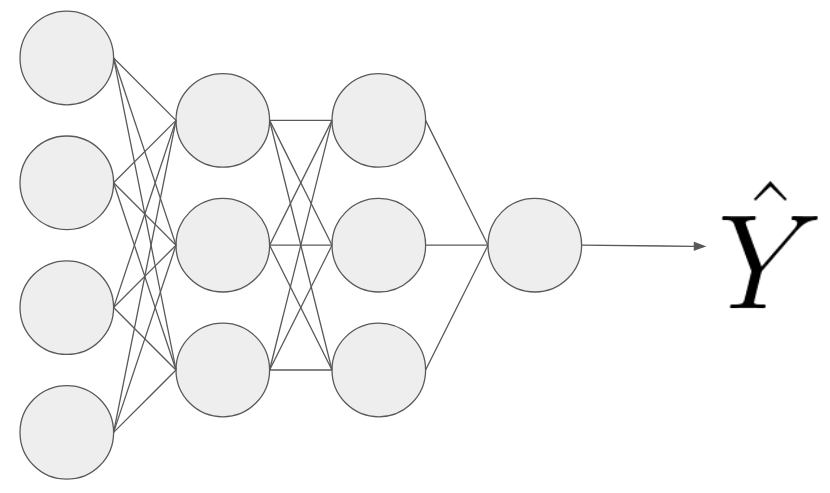

For `dA3`, use the following formula corresponding to the derivative of the last `A` matrix:
$$dA^{[L]} = \frac{1 - Y}{1 - A^{[L]}}-\frac{Y}{A^{[L]}}$$

Notice how we use `_` in place of `dA0`. This is because we don't want to calculate `dA` at that point -- there is no `A0` to take the derivative of.

In [ ]:
def neural_network(X, num_iterations=1000000):

  # START CODE HERE
  W1, b1 = None
  W2, b2 = None
  W3, b3 = None
  # END CODE HERE

  for i in range(num_iterations):
    # START CODE HERE
    Z1, A1 = None
    Z2, A2 = None
    Z3, A3 = None

    dA3 = None

    dA2, W3, b3 = None
    dA1, W2, b2 = None
    _, W1, b1 = None
    # END CODE HERE

### Solution:

In [ ]:
def neural_network_sol(X, Y, learning_rate):

  # START CODE HERE
  W1, b1 = initialize_weights_and_biases(3, 4)
  W2, b2 = initialize_weights_and_biases(4, 3)
  W3, b3 = initialize_weights_and_biases(3, 4)
  # END CODE HERE

  for i in range(num_iterations):
    # START CODE HERE
    Z1, A1 = forward_propagate(X, W1, b1)
    Z2, A2 = forward_propagate(A1, W2, b2)
    Z3, A3 = forward_propagate(A2, W3, b3, activation_function="sigmoid")

    dA3 = (1 - Y) / (1 - A3) - Y / A3

    dA2, W3, b3 = back_propagate(Z3, A3, A2, W3, b3, dA3,
                                 learning_rate=learning_rate)
    dA1, W2, b2 = back_propagate(Z2, A2, A1, W2, b2, dA2,
                                 learning_rate=learning_rate)
    _, W1, b1 = back_propagate(Z1, A1, X, W1, b1, dA1,
                                 learning_rate=learning_rate)
    # END CODE HERE